In [112]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [113]:
url = "https://raw.githubusercontent.com/yarmukh/Course_Project_Python_in_Science-Engineering/refs/heads/master/Train.csv"
df = pd.read_csv(url)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**Посмотри на график каждого столбца**

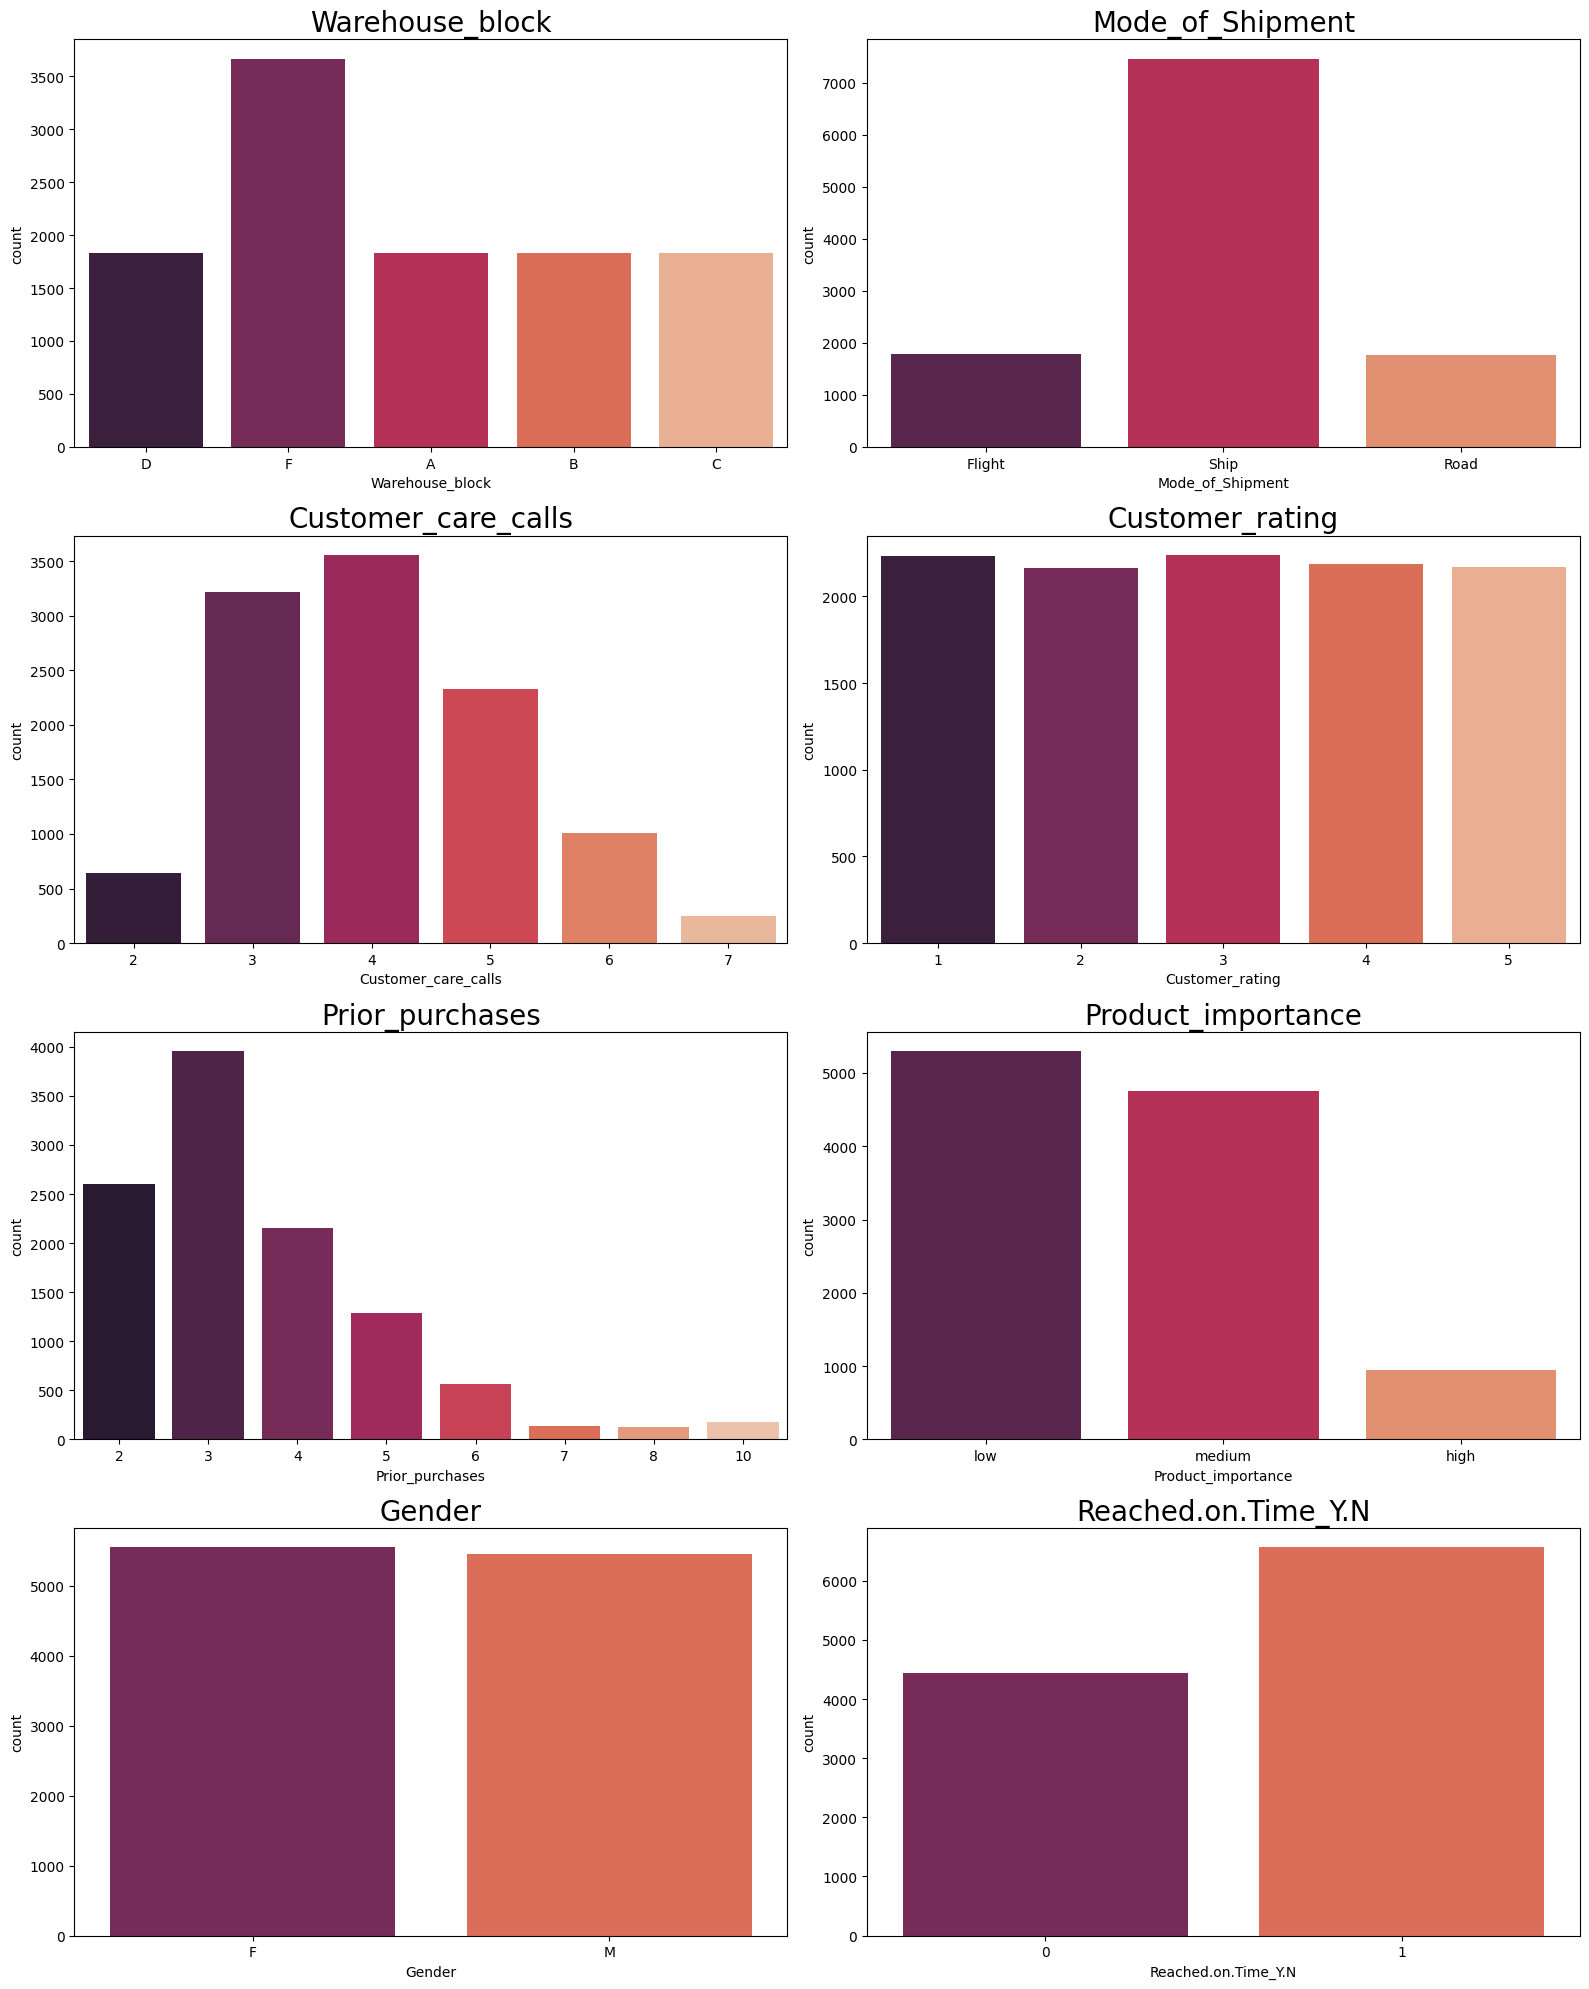

In [114]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='rocket')
        plt.title(cols[i], fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Преобразовываем нечисловые поля и удаляем колонку "ID" 

In [115]:
conditions = [df["Warehouse_block"] == "A", 
              df["Warehouse_block"] == "B", 
              df["Warehouse_block"] == 'C', 
              df["Warehouse_block"] == 'D',
              df["Warehouse_block"] == "E",
              df["Warehouse_block"] == 'F']

choices = [0, 1, 2, 3, 4, 5] 
df["Warehouse_block"] = np.select(conditions, choices, default = df["Warehouse_block"])

df["Mode_of_Shipment"] = np.select([df["Mode_of_Shipment"] == "Flight", 
                                    df["Mode_of_Shipment"] == "Ship", 
                                    df["Mode_of_Shipment"] == "Road"], 
                                  [0, 1, 2], df["Mode_of_Shipment"])
df["Gender"] = np.select([df["Gender"] == 'F', 
                          df["Gender"] == 'M'],
                         [0, 1], df["Gender"])
df["Product_importance"] = np.select([df["Product_importance"] == 'low', 
                                      df["Product_importance"] == 'medium', 
                                      df["Product_importance"] == "high"],
                                     [0, 1, 2], df["Product_importance"])
df = df.drop(columns="ID", errors='ignore')

**Произвожу центрирование и нормирование данных\.**  
По формуле: $$ \overline{x} = {x - μ \over σ} $$где:  
    μ среднее для каждого столбца;
    σ стандартное отклонение для каждого столбца\.  
**Столбцы**
1. Warehouse_block
2.  Mode_of_Shipment
3.   Gender
4.    Reached.on.Time_Y.N
**не центрируем и не нормируем** - в них не содержатся числовые данные, а по алгоритму мы должны центрировать и нормировать только числовые признаки.

In [116]:
columns = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance']
df_standardized = (df - df.mean()) / df.std()

for name in ["Warehouse_block", "Mode_of_Shipment", "Gender", "Reached.on.Time_Y.N"]:
    df_standardized[name] = df[name]
df_standardized

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,-0.047709,-0.700723,-0.69069,-0.372718,-0.942533,0,1.889897,-1.468173,1
1,5,0,-0.047709,1.421513,0.12074,-1.029377,-0.942533,1,2.815508,-0.333878,1
2,0,0,-1.799806,-0.700723,-0.565855,0.283941,-0.942533,1,2.136727,-0.158995,1
3,1,0,-0.923757,0.006689,-0.711496,0.283941,0.616402,1,-0.208152,-1.502416,1
4,2,0,-1.799806,-0.700723,-0.545049,-0.372718,0.616402,0,2.013312,-0.703212,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,0,1,-0.047709,-1.408135,0.869753,0.940601,0.616402,0,-0.763518,-1.281672,1
10995,1,1,-0.047709,-1.408135,0.453635,0.940601,0.616402,0,-0.454982,-1.459612,0
10996,2,1,0.828339,0.714101,0.661694,0.940601,-0.942533,0,-0.578396,-1.515868,0
10997,5,1,0.828339,-0.700723,0.266381,1.59726,0.616402,1,-0.701811,-1.482237,0


**Смотрим на графики элементов после центрирования и нормирования\.**

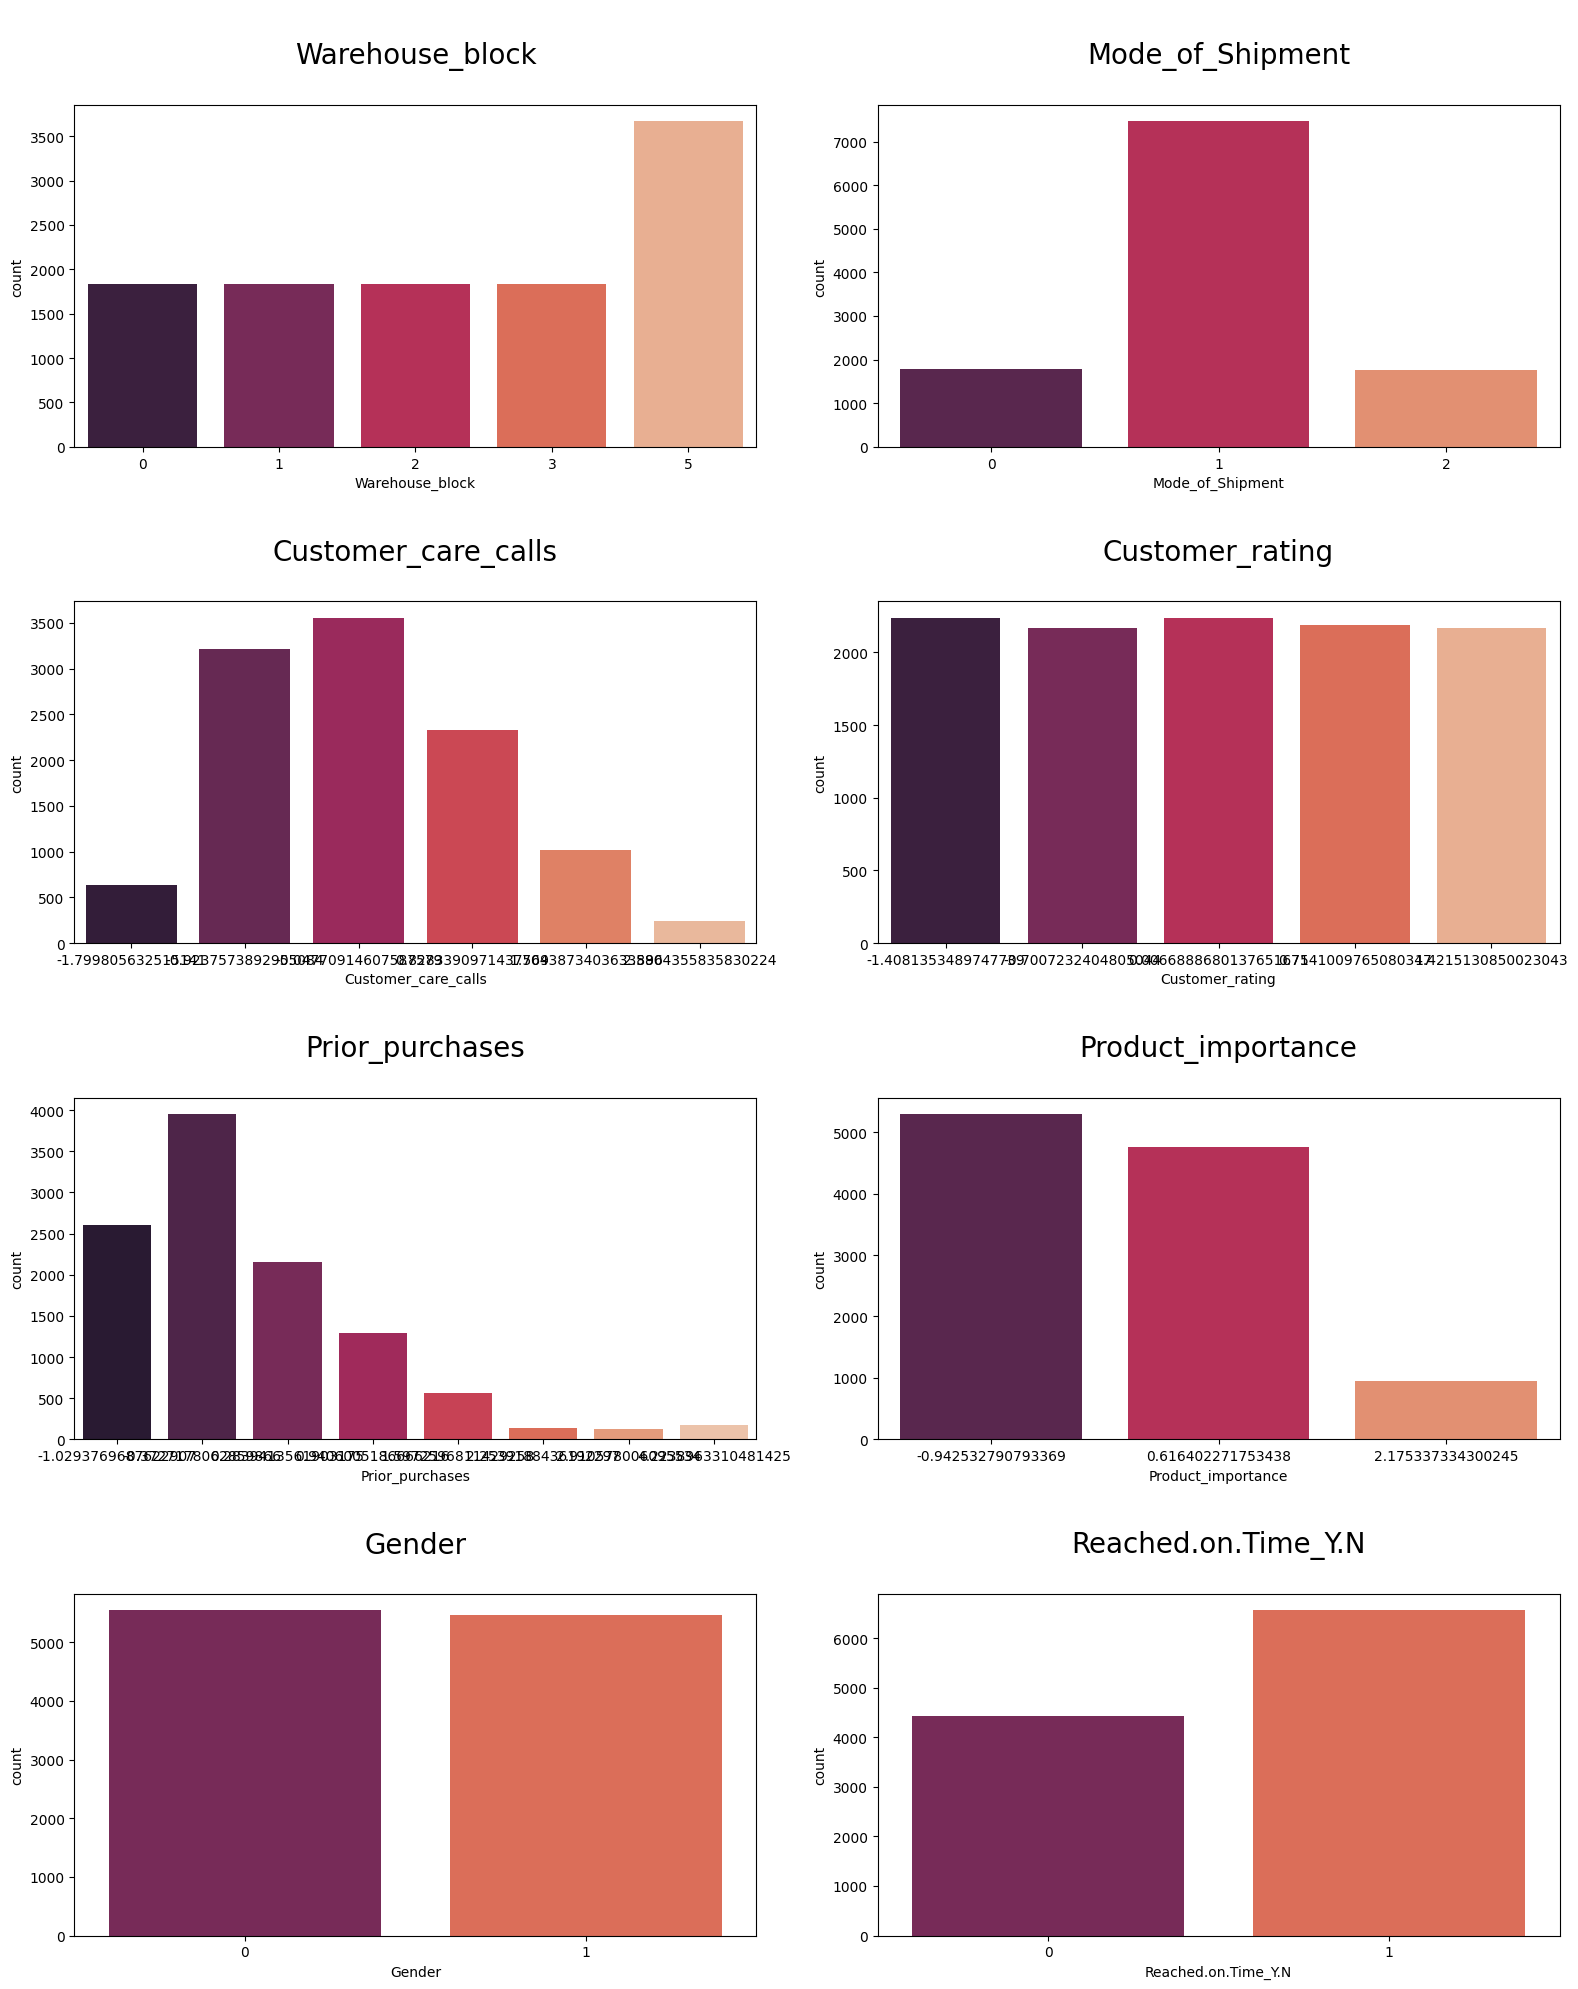

In [117]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = df_standardized, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]}\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**Делаем матрицу корреляций при помощи метода cor()\.**

**Корреляция** — это **статистическая мера**, которая показывает:

    1) Направление связи между двумя переменными:
        Положительная (+1): чем больше X, тем больше Y
        
        Отрицательная (-1): чем больше X, тем меньше Y
        
        Нулевая (0): связи нет

    2) Силу связи:
        От -1 до 1, где значения ближе к 1 или -1 указывают на сильную зависимост.

**Матрица корреляций** - это таблица, где:

    1) Строки и столбцы — признаки (переменные) датасета.
    
    2) Ячейки на пересечении — коэффициент корреляции между парой признаков.

In [118]:
corrilation_mtx = df_standardized.corr()

**Находим собственные значения и собственные вектора матрицы корреляций** с помощью метода eig() из библиотеки numpy.   
**Сортируем** массив с собственными значениями.  

In [119]:
eigen_values, eigen_vectors= np.linalg.eig(corrilation_mtx) 
sorted_idx = np.argsort(eigen_values)[::-1]
eigenvalues = eigen_values[sorted_idx]
eigenvectors = eigen_vectors[:, sorted_idx]

**Выбираем** собственные вектора **с наибольшим собственным значением.**  
Переменная **number_components - количество главных компонент.**  
**Проецируем на них** изначальные данные.

In [120]:
number_components = 5

eigen_vectors = eigen_vectors[:, :number_components]
df_projected_data = df_standardized.dot(eigen_vectors)

**Выведим таблицу с кореляцией исходных данных и обработанных\.**

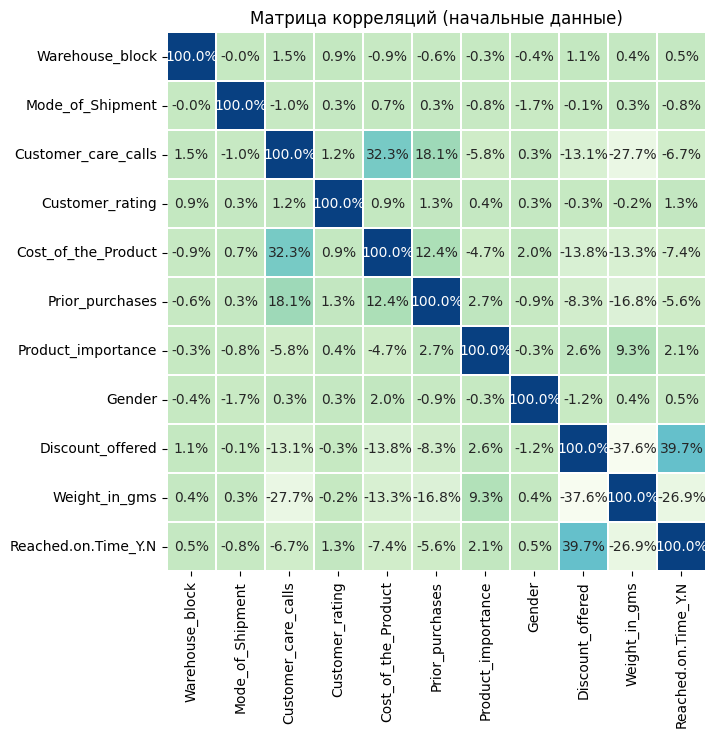

In [121]:
#изначальный набор данных
figsize = (7,7)
fontsize_annotation = 10 # размер шрифта в таблице
fig, ax = plt.subplots(figsize=figsize)
plt.title('Матрица корреляций (начальные данные)')
heatmap_df = sns.heatmap(df.corr(), #
                   annot=True, # вставляем значения из таблицы df.corr() 
                   square=True, # клетки внутри таблицы кваратные
                   fmt='.1%', #формат вывода данных
                   cmap='GnBu', #цветовая палитра
                   cbar=False, # убераем шкалу цветов
                   annot_kws={'size':str(fontsize_annotation)}, # изменяем размер текста 
                   linewidth=0.02 # ширина границы ячейки
                  )
plt.savefig('Correlation_matrix_df.png',dpi=300) # сохраняем таблицу
plt.show()

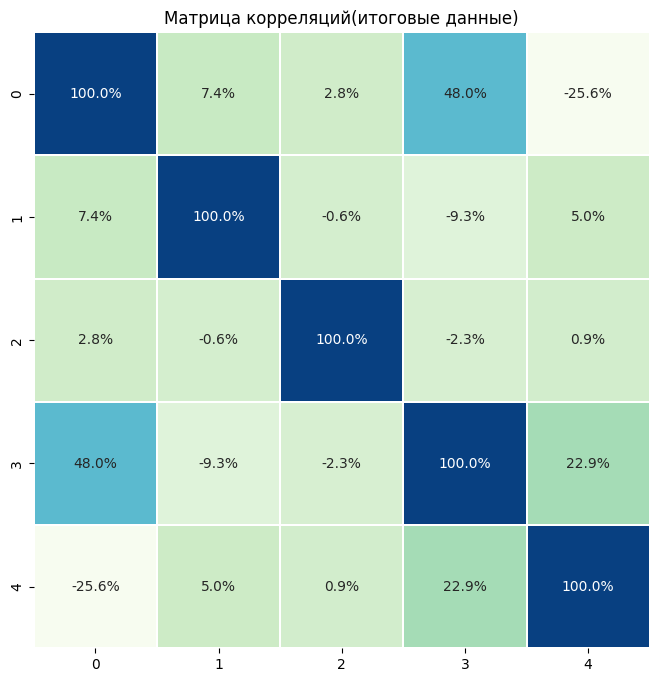

In [122]:
#отредактированный набор даных
figsize = (8,8)
fontsize_annotation = 10
fig, ax = plt.subplots(figsize=figsize)
plt.title('Матрица корреляций(итоговые данные)')
heat_map_df_edded = sns.heatmap(df_projected_data.corr(), 
                   annot=True, 
                   square=True, 
                   fmt='.1%', 
                   cmap='GnBu', 
                   cbar=False, 
                   annot_kws={'size':str(fontsize_annotation)}, 
                   linewidth=0.1 
                  )
plt.savefig('Correlation_matrix_df_edded.png',dpi=300)
plt.show()

**Можем заметить, что после выбора главных компонент матрица корреляций стала меньше, но сохранила высокие коэфиценты корриляций между параметрами.**

Возьмём **первые две главные компоненты** и попробуем построить **графики с ними.**  
Каждая **точка — это одно наблюдение** из данных, спроецированное на плоскости двух главных компонент (PC1 и PC2).

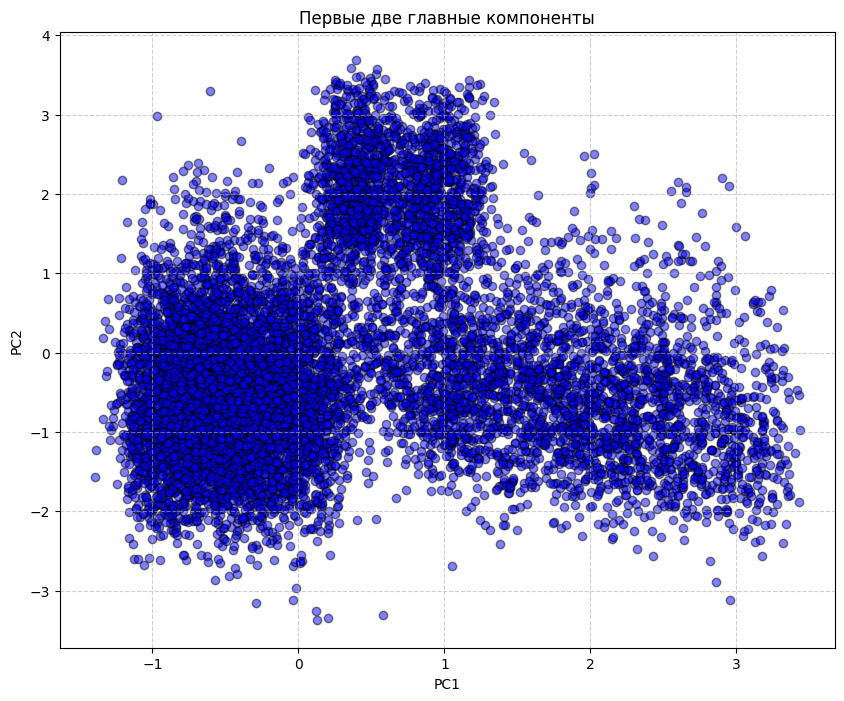

In [123]:
plt.figure(figsize=(10, 8))
plt.scatter(df_projected_data.iloc[:, 0], df_projected_data.iloc[:, 1], alpha=0.5, color='blue', edgecolor='k')
plt.title('Первые две главные компоненты')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('two_principal_components.png',dpi=300)
plt.show()

**Посмотрим какие изначальные параметры влияют на компоненты PC1 и PC2.**  

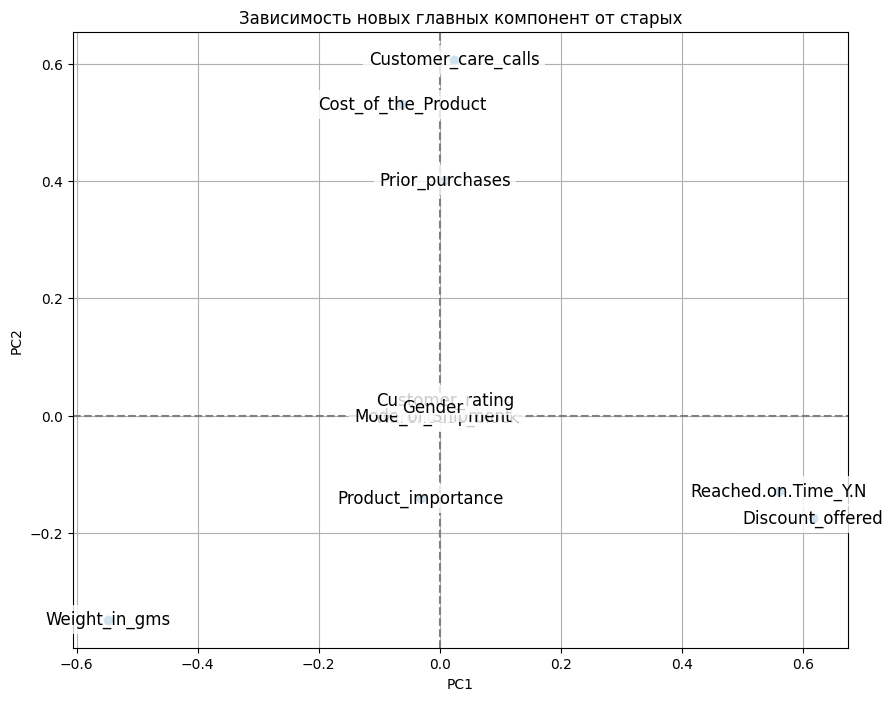

In [124]:
loadings = pd.DataFrame(eigen_vectors[:, :2], 
                        index=df_standardized.columns, 
                        columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 8))
plt.scatter(loadings['PC1'], loadings['PC2'])
plt.title('Зависимость новых главных компонент от старых')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

for var in loadings.index:
    plt.text(loadings.loc[var, 'PC1'], loadings.loc[var, 'PC2'], var, 
             fontsize=12, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.grid()
plt.savefig('component dependency.png',dpi=300)
plt.show()

**Вклад в главные компоненты вносят:**  
    PC1:  
        **Сильное положительное влияние**: Reached.on.Time_Y.N, Discount_offered.  
        **Сильное отрицательное влияние**: Weight_in_gms, Product_importance.  
    PC2:  
        **Сильное положительное влияние**: Customer_care_calls, Cost_of_the_Product, Prior_purchases.  
        **Сильное отрицательное влияние**: Weight_in_gms, Product_importance. Reached.on.Time_Y.N, Discount_offered.         
**Оказывают незначимое влияние на обе главные компоненты**: Gender, Mode_of_Shipment, Warehouse_block и Customer_rating.

Посмотрим, как будут расположены точки в трёхмерном пространстве.  
Четыре разных ракурса помогают выявить скрытые закономерности, которые могут быть незаметны при стандартном 2D-анализе.

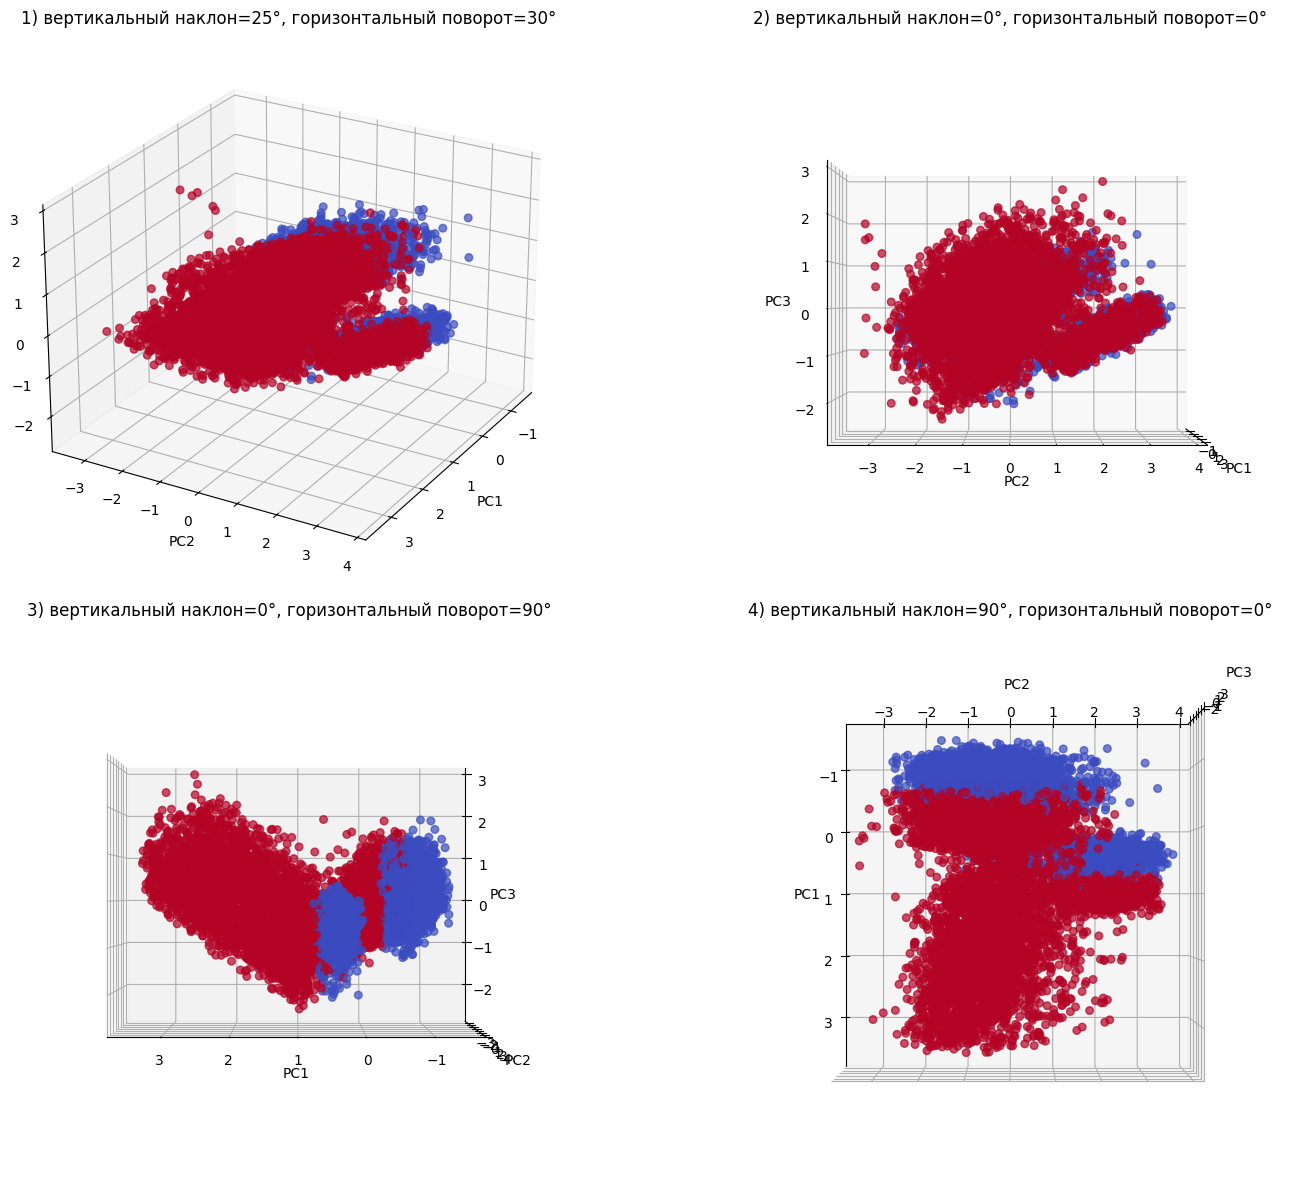

In [127]:
fig = plt.figure(figsize=(16, 12))

angles = [
    (25, 30),  # Стандартный вид
    (0, 0),    # Вид сверху (XY)
    (0, 90),   # Вид сбоку (XZ)
    (90, 0)    # Вид спереди (YZ)
]
# Создаем 4 подграфика в сетке 2x2
# enumerate(angles, 1) - перебираем элементы в angles, начиная с индекса 1
for i, (elev, azim) in enumerate(angles, 1):
    # Создаем подграфик в i-й позиции сетки 2x2
    ax = fig.add_subplot(2, 2, i, projection='3d')
    # Рисуем точки:
    ax.scatter(
        df_projected_data.iloc[:, 0],   # Координата X = PC1
        df_projected_data.iloc[:, 1],   # Координата Y = PC2
        df_projected_data.iloc[:, 2],   # Координата Z = PC3
        c=df['Reached.on.Time_Y.N'],    # Цвет точек по целевому признаку
        cmap='coolwarm',                # Цветовая схема  
                                        #доставлено вовремя → Синий цвет, опоздание → Красный цвет
        alpha=0.7,                      # Прозрачность точек
        s=30                            # Размер точек
    )
    # Устанавливаем угол обзора камеры:
    ax.view_init(elev=elev,  # Угол возвышения (вертикальный наклон)
                azim=azim)   # Азимут (горизонтальный поворот)
    ax.set_title(f'{i}) вертикальный наклон={elev}°, горизонтальный поворот={azim}°')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
# Автоматически настраиваем отступы между графиками
plt.tight_layout()
plt.show()

Например, на третьем графике видно, что при PC1 > 1 посылка не приходит вовремя.  
По русункам также видно, что точки расположенны довольно равномерно по PC3, сложно по ней определить прибудет ли посылка вовремя.  
Про какие-то закономерности на PC2 ничего сказать нельзя, такой 